In [70]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [10,8] # Set default figure size

import requests

### Series

In [71]:
s = pd.Series(np.random.randn(4), name='daily returns')
s

0    2.0
1    2.0
2   -0.6
3    0.8
Name: daily returns, dtype: float64

In [72]:
s * 100

0    196.2
1    195.0
2    -56.3
3     83.2
Name: daily returns, dtype: float64

In [73]:
np.abs(s)

0    2.0
1    2.0
2    0.6
3    0.8
Name: daily returns, dtype: float64

In [74]:
s.describe()

count    4.0
mean     1.0
std      1.2
min     -0.6
25%      0.5
50%      1.4
75%      2.0
max      2.0
Name: daily returns, dtype: float64

In [75]:
s.index = ['AMZN', 'AAPL', 'MSFT', 'GOOG']
s

AMZN    2.0
AAPL    2.0
MSFT   -0.6
GOOG    0.8
Name: daily returns, dtype: float64

In [76]:
s['AMZN']

1.962144797170022

In [77]:
s['AMZN'] = 0
s

AMZN    0.0
AAPL    2.0
MSFT   -0.6
GOOG    0.8
Name: daily returns, dtype: float64

In [78]:
'AAPL' in s

True

### DataFrames

In [79]:
df = pd.read_csv('https://raw.githubusercontent.com/QuantEcon/lecture-python-programming/master/source/_static/lecture_specific/pandas/data/test_pwt.csv')
type(df)

pandas.core.frame.DataFrame

In [80]:
df

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
0,Argentina,ARG,2000,3.7e+04,1.0,3.0e+05,75.7,5.6
1,Australia,AUS,2000,1.9e+04,1.7,5.4e+05,67.8,6.7
2,India,IND,2000,1.0e+06,44.9,1.7e+06,64.6,14.1
3,Israel,ISR,2000,6.1e+03,4.1,1.3e+05,64.4,10.3
4,Malawi,MWI,2000,1.2e+04,59.5,5.0e+03,74.7,11.7
5,South Africa,ZAF,2000,4.5e+04,6.9,2.3e+05,72.7,5.7
6,United States,USA,2000,2.8e+05,1.0,9.9e+06,72.3,6.0
7,Uruguay,URY,2000,3.2e+03,12.1,2.5e+04,79.0,5.1


#### Select Data by Position

In [81]:
df[2:5]

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
2,India,IND,2000,1.0e+06,44.9,1.7e+06,64.6,14.1
3,Israel,ISR,2000,6.1e+03,4.1,1.3e+05,64.4,10.3
4,Malawi,MWI,2000,1.2e+04,59.5,5.0e+03,74.7,11.7


In [82]:
df[['country', 'tcgdp']]

,country,tcgdp
0,Argentina,3.0e+05
1,Australia,5.4e+05
2,India,1.7e+06
3,Israel,1.3e+05
4,Malawi,5.0e+03
5,South Africa,2.3e+05
6,United States,9.9e+06
7,Uruguay,2.5e+04


In [83]:
df.iloc[2:5, 0:4]

,country,country isocode,year,POP
2,India,IND,2000,1.0e+06
3,Israel,ISR,2000,6.1e+03
4,Malawi,MWI,2000,1.2e+04


In [84]:
df.loc[df.index[2:5], ['country', 'tcgdp']]

,country,tcgdp
2,India,1.7e+06
3,Israel,1.3e+05
4,Malawi,5.0e+03


#### Select Data by Conditions

In [85]:
df[df.POP >= 20000]

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
0,Argentina,ARG,2000,3.7e+04,1.0,3.0e+05,75.7,5.6
2,India,IND,2000,1.0e+06,44.9,1.7e+06,64.6,14.1
5,South Africa,ZAF,2000,4.5e+04,6.9,2.3e+05,72.7,5.7
6,United States,USA,2000,2.8e+05,1.0,9.9e+06,72.3,6.0


In [86]:
df.POP >= 20000

0     True
1    False
2     True
3    False
4    False
5     True
6     True
7    False
Name: POP, dtype: bool

In [87]:
df[(df.country.isin(['Argentina', 'India', 'South Africa'])) & (df.POP > 40000)]

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
2,India,IND,2000,1.0e+06,44.9,1.7e+06,64.6,14.1
5,South Africa,ZAF,2000,4.5e+04,6.9,2.3e+05,72.7,5.7


In [88]:
# the above is equivalent to
df.query("POP >= 20000")

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
0,Argentina,ARG,2000,3.7e+04,1.0,3.0e+05,75.7,5.6
2,India,IND,2000,1.0e+06,44.9,1.7e+06,64.6,14.1
5,South Africa,ZAF,2000,4.5e+04,6.9,2.3e+05,72.7,5.7
6,United States,USA,2000,2.8e+05,1.0,9.9e+06,72.3,6.0


In [89]:
df.query("country in ['Argentina', 'India', 'South Africa'] and POP > 40000")

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
2,India,IND,2000,1.0e+06,44.9,1.7e+06,64.6,14.1
5,South Africa,ZAF,2000,4.5e+04,6.9,2.3e+05,72.7,5.7


In [90]:
df[(df.cc + df.cg >= 80) & (df.POP <= 20000)]

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
4,Malawi,MWI,2000,11801.5,59.5,5026.2,74.7,11.7
7,Uruguay,URY,2000,3219.8,12.1,25256.0,79.0,5.1


In [91]:
# the above is equivalent to
df.query("cc + cg >= 80 & POP <= 20000")

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
4,Malawi,MWI,2000,11801.5,59.5,5026.2,74.7,11.7
7,Uruguay,URY,2000,3219.8,12.1,25256.0,79.0,5.1


In [92]:
df.loc[df.cc == max(df.cc)]

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
7,Uruguay,URY,2000,3219.8,12.1,25256.0,79.0,5.1


In [93]:
df.loc[(df.cc + df.cg >= 80) & (df.POP <= 20000), ['country', 'year', 'POP']]

,country,year,POP
4,Malawi,2000,11801.5
7,Uruguay,2000,3219.8


In [94]:
df_subset = df[['country', 'POP', 'tcgdp']]
df_subset

,country,POP,tcgdp
0,Argentina,3.7e+04,3.0e+05
1,Australia,1.9e+04,5.4e+05
2,India,1.0e+06,1.7e+06
3,Israel,6.1e+03,1.3e+05
4,Malawi,1.2e+04,5.0e+03
5,South Africa,4.5e+04,2.3e+05
6,United States,2.8e+05,9.9e+06
7,Uruguay,3.2e+03,2.5e+04


In [95]:
df_subset.to_csv('data/pwt_subset.csv', index = False)

#### Apply Method

In [96]:
df[['year', 'POP', 'XRAT', 'tcgdp', 'cc', 'cg']].apply(max)

year     2.0e+03
POP      1.0e+06
XRAT     6.0e+01
tcgdp    9.9e+06
cc       7.9e+01
cg       1.4e+01
dtype: float64

In [97]:
df.apply(lambda row: row, axis=1)

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
0,Argentina,ARG,2000,3.7e+04,1.0,3.0e+05,75.7,5.6
1,Australia,AUS,2000,1.9e+04,1.7,5.4e+05,67.8,6.7
2,India,IND,2000,1.0e+06,44.9,1.7e+06,64.6,14.1
3,Israel,ISR,2000,6.1e+03,4.1,1.3e+05,64.4,10.3
4,Malawi,MWI,2000,1.2e+04,59.5,5.0e+03,74.7,11.7
5,South Africa,ZAF,2000,4.5e+04,6.9,2.3e+05,72.7,5.7
6,United States,USA,2000,2.8e+05,1.0,9.9e+06,72.3,6.0
7,Uruguay,URY,2000,3.2e+03,12.1,2.5e+04,79.0,5.1


In [98]:
complexCondition = df.apply(lambda row: row.POP > 40000 if row.country in ['Argentina', 
                                                                           'India', 
                                                                           'South Africa'] else row.POP < 20000,
                            axis = 1), ['country', 'year', 'POP', 'XRAT', 'tcgdp']

In [99]:
complexCondition

(0    False
 1     True
 2     True
 3     True
 4     True
 5     True
 6    False
 7     True
 dtype: bool,
 ['country', 'year', 'POP', 'XRAT', 'tcgdp'])

In [100]:
df.loc[complexCondition]

,country,year,POP,XRAT,tcgdp
1,Australia,2000,1.9e+04,1.7,5.4e+05
2,India,2000,1.0e+06,44.9,1.7e+06
3,Israel,2000,6.1e+03,4.1,1.3e+05
4,Malawi,2000,1.2e+04,59.5,5.0e+03
5,South Africa,2000,4.5e+04,6.9,2.3e+05
7,Uruguay,2000,3.2e+03,12.1,2.5e+04


#### Make Changes in DataFrames

In [101]:
df.where(df.POP >= 20000, False)

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
0,Argentina,ARG,2000,37335.7,1.0,295072.2,75.7,5.6
1,False,False,False,False,False,False,False,False
2,India,IND,2000,1006300.3,44.9,1728144.4,64.6,14.1
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
5,South Africa,ZAF,2000,45064.1,6.9,227242.4,72.7,5.7
6,United States,USA,2000,282172.0,1.0,9898700.0,72.3,6.0
7,False,False,False,False,False,False,False,False


In [102]:
df.loc[df.cg == max(df.cg), 'cg'] = np.nan
df

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
0,Argentina,ARG,2000,3.7e+04,1.0,3.0e+05,75.7,5.6
1,Australia,AUS,2000,1.9e+04,1.7,5.4e+05,67.8,6.7
2,India,IND,2000,1.0e+06,44.9,1.7e+06,64.6,NaN
3,Israel,ISR,2000,6.1e+03,4.1,1.3e+05,64.4,10.3
4,Malawi,MWI,2000,1.2e+04,59.5,5.0e+03,74.7,11.7
5,South Africa,ZAF,2000,4.5e+04,6.9,2.3e+05,72.7,5.7
6,United States,USA,2000,2.8e+05,1.0,9.9e+06,72.3,6.0
7,Uruguay,URY,2000,3.2e+03,12.1,2.5e+04,79.0,5.1


In [103]:
def update_row(row):

    # modify POP
    row.POP = np.nan if row.POP<= 10000 else row.POP

    # modify XRAT
    row.XRAT = row.XRAT / 10
    
    return row

df.apply(update_row, axis=1)

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
0,Argentina,ARG,2000,3.7e+04,1.0e-01,3.0e+05,75.7,5.6
1,Australia,AUS,2000,1.9e+04,1.7e-01,5.4e+05,67.8,6.7
2,India,IND,2000,1.0e+06,4.5e+00,1.7e+06,64.6,NaN
3,Israel,ISR,2000,NaN,4.1e-01,1.3e+05,64.4,10.3
4,Malawi,MWI,2000,1.2e+04,6.0e+00,5.0e+03,74.7,11.7
5,South Africa,ZAF,2000,4.5e+04,6.9e-01,2.3e+05,72.7,5.7
6,United States,USA,2000,2.8e+05,1.0e-01,9.9e+06,72.3,6.0
7,Uruguay,URY,2000,NaN,1.2e+00,2.5e+04,79.0,5.1


In [104]:
# Round all decimal numbers to 2 decimal places
df.applymap(lambda x : round(x,2) if type(x)!=str else x)

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
0,Argentina,ARG,2000,3.7e+04,1.0,3.0e+05,75.7,5.6
1,Australia,AUS,2000,1.9e+04,1.7,5.4e+05,67.8,6.7
2,India,IND,2000,1.0e+06,44.9,1.7e+06,64.6,NaN
3,Israel,ISR,2000,6.1e+03,4.1,1.3e+05,64.4,10.3
4,Malawi,MWI,2000,1.2e+04,59.5,5.0e+03,74.7,11.7
5,South Africa,ZAF,2000,4.5e+04,6.9,2.3e+05,72.7,5.7
6,United States,USA,2000,2.8e+05,1.0,9.9e+06,72.3,6.0
7,Uruguay,URY,2000,3.2e+03,12.1,2.5e+04,79.0,5.1


In [105]:
for idx in list(zip([0, 3, 5, 6], [3, 4, 6, 2])):
    df.iloc[idx] = np.nan

df

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
0,Argentina,ARG,2000.0,NaN,1.0,3.0e+05,75.7,5.6
1,Australia,AUS,2000.0,1.9e+04,1.7,5.4e+05,67.8,6.7
2,India,IND,2000.0,1.0e+06,44.9,1.7e+06,64.6,NaN
3,Israel,ISR,2000.0,6.1e+03,NaN,1.3e+05,64.4,10.3
4,Malawi,MWI,2000.0,1.2e+04,59.5,5.0e+03,74.7,11.7
5,South Africa,ZAF,2000.0,4.5e+04,6.9,2.3e+05,NaN,5.7
6,United States,USA,NaN,2.8e+05,1.0,9.9e+06,72.3,6.0
7,Uruguay,URY,2000.0,3.2e+03,12.1,2.5e+04,79.0,5.1


In [106]:
# replace all NaN values by 0
def replace_nan(x):
    
    if type(x)!=str:
        return 0 if np.isnan(x) else x
    else:
        return x

df.applymap(replace_nan)

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
0,Argentina,ARG,2000.0,0.0e+00,1.0,3.0e+05,75.7,5.6
1,Australia,AUS,2000.0,1.9e+04,1.7,5.4e+05,67.8,6.7
2,India,IND,2000.0,1.0e+06,44.9,1.7e+06,64.6,0.0
3,Israel,ISR,2000.0,6.1e+03,0.0,1.3e+05,64.4,10.3
4,Malawi,MWI,2000.0,1.2e+04,59.5,5.0e+03,74.7,11.7
5,South Africa,ZAF,2000.0,4.5e+04,6.9,2.3e+05,0.0,5.7
6,United States,USA,0.0,2.8e+05,1.0,9.9e+06,72.3,6.0
7,Uruguay,URY,2000.0,3.2e+03,12.1,2.5e+04,79.0,5.1


In [107]:
df = df.fillna(df.iloc[:,2:8].mean())
df

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
0,Argentina,ARG,2000.0,2.0e+05,1.0,3.0e+05,75.7,5.6
1,Australia,AUS,2000.0,1.9e+04,1.7,5.4e+05,67.8,6.7
2,India,IND,2000.0,1.0e+06,44.9,1.7e+06,64.6,7.3
3,Israel,ISR,2000.0,6.1e+03,18.2,1.3e+05,64.4,10.3
4,Malawi,MWI,2000.0,1.2e+04,59.5,5.0e+03,74.7,11.7
5,South Africa,ZAF,2000.0,4.5e+04,6.9,2.3e+05,71.2,5.7
6,United States,USA,2000.0,2.8e+05,1.0,9.9e+06,72.3,6.0
7,Uruguay,URY,2000.0,3.2e+03,12.1,2.5e+04,79.0,5.1


In [108]:
df = df[['country', 'POP', 'tcgdp']]
df

,country,POP,tcgdp
0,Argentina,2.0e+05,3.0e+05
1,Australia,1.9e+04,5.4e+05
2,India,1.0e+06,1.7e+06
3,Israel,6.1e+03,1.3e+05
4,Malawi,1.2e+04,5.0e+03
5,South Africa,4.5e+04,2.3e+05
6,United States,2.8e+05,9.9e+06
7,Uruguay,3.2e+03,2.5e+04


In [109]:
df = df.set_index('country')
df

,POP,tcgdp
country,,
Argentina,2.0e+05,3.0e+05
Australia,1.9e+04,5.4e+05
India,1.0e+06,1.7e+06
Israel,6.1e+03,1.3e+05
Malawi,1.2e+04,5.0e+03
South Africa,4.5e+04,2.3e+05
United States,2.8e+05,9.9e+06
Uruguay,3.2e+03,2.5e+04


In [110]:
df.columns = 'population', 'total GDP'
df

,population,total GDP
country,,
Argentina,2.0e+05,3.0e+05
Australia,1.9e+04,5.4e+05
India,1.0e+06,1.7e+06
Israel,6.1e+03,1.3e+05
Malawi,1.2e+04,5.0e+03
South Africa,4.5e+04,2.3e+05
United States,2.8e+05,9.9e+06
Uruguay,3.2e+03,2.5e+04


In [111]:
df['population'] = df['population'] * 1e3
df

,population,total GDP
country,,
Argentina,2.0e+08,3.0e+05
Australia,1.9e+07,5.4e+05
India,1.0e+09,1.7e+06
Israel,6.1e+06,1.3e+05
Malawi,1.2e+07,5.0e+03
South Africa,4.5e+07,2.3e+05
United States,2.8e+08,9.9e+06
Uruguay,3.2e+06,2.5e+04


In [112]:
df['GDP percap'] = df['total GDP'] * 1e6 / df['population']
df

,population,total GDP,GDP percap
country,,,
Argentina,2.0e+08,3.0e+05,1503.6
Australia,1.9e+07,5.4e+05,28436.4
India,1.0e+09,1.7e+06,1717.3
Israel,6.1e+06,1.3e+05,21138.7
Malawi,1.2e+07,5.0e+03,425.9
South Africa,4.5e+07,2.3e+05,5042.6
United States,2.8e+08,9.9e+06,35080.4
Uruguay,3.2e+06,2.5e+04,7844.0


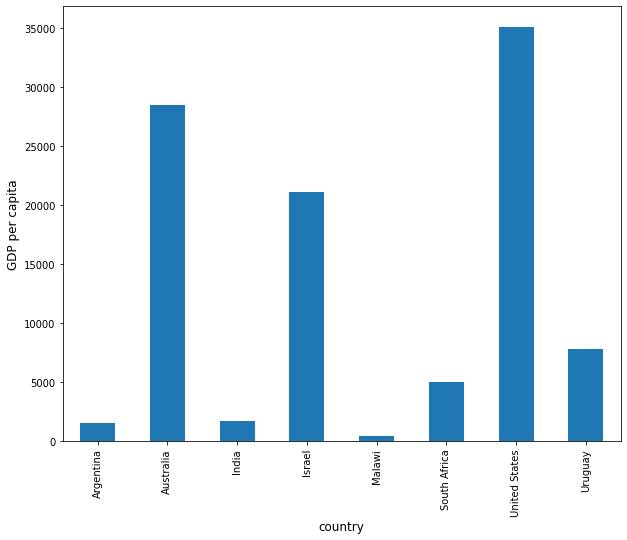

In [113]:
ax = df['GDP percap'].plot(kind='bar')
ax.set_xlabel('country', fontsize=12)
ax.set_ylabel('GDP per capita', fontsize=12)
plt.show()

In [114]:
df = df.sort_values(by='GDP percap', ascending=False)
df

,population,total GDP,GDP percap
country,,,
United States,2.8e+08,9.9e+06,35080.4
Australia,1.9e+07,5.4e+05,28436.4
Israel,6.1e+06,1.3e+05,21138.7
Uruguay,3.2e+06,2.5e+04,7844.0
South Africa,4.5e+07,2.3e+05,5042.6
India,1.0e+09,1.7e+06,1717.3
Argentina,2.0e+08,3.0e+05,1503.6
Malawi,1.2e+07,5.0e+03,425.9


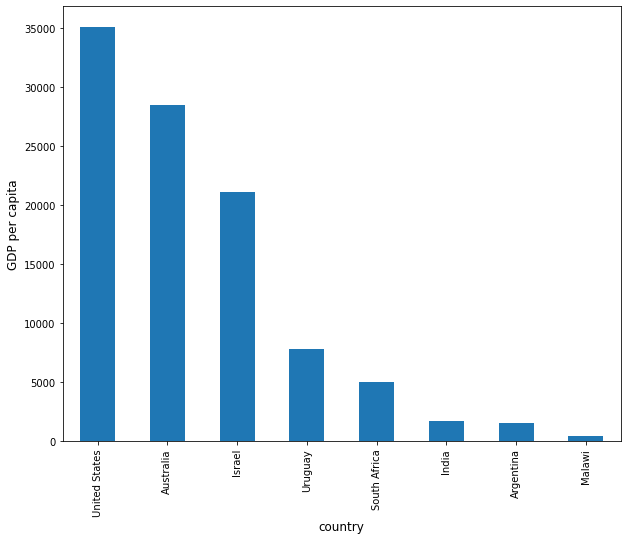

In [115]:
ax = df['GDP percap'].plot(kind='bar')
ax.set_xlabel('country', fontsize=12)
ax.set_ylabel('GDP per capita', fontsize=12)
plt.show()

### On-Line Data Sources

#### Accessing Data with requests

In [116]:
r = requests.get('http://research.stlouisfed.org/fred2/series/UNRATE/downloaddata/UNRATE.csv')

In [117]:
url = 'http://research.stlouisfed.org/fred2/series/UNRATE/downloaddata/UNRATE.csv'
source = requests.get(url).content.decode().split("\n")
source[0]

'DATE,VALUE\r'

In [118]:
source[1]

'1948-01-01,3.4\r'

In [119]:
source[2]

'1948-02-01,3.8\r'

In [120]:
data = pd.read_csv(url, index_col=0, parse_dates=True)

In [121]:
type(data)

pandas.core.frame.DataFrame

In [122]:
data.head() # A useful method to get a quick look at a data frame

,VALUE
DATE,
1948-01-01,3.4
1948-02-01,3.8
1948-03-01,4.0
1948-04-01,3.9
1948-05-01,3.5


In [123]:
pd.set_option('display.precision', 1)
data.describe() # Your output might differ slightly

,VALUE
count,901.0
mean,5.7
std,1.7
min,2.5
25%,4.4
50%,5.5
75%,6.8
max,14.7


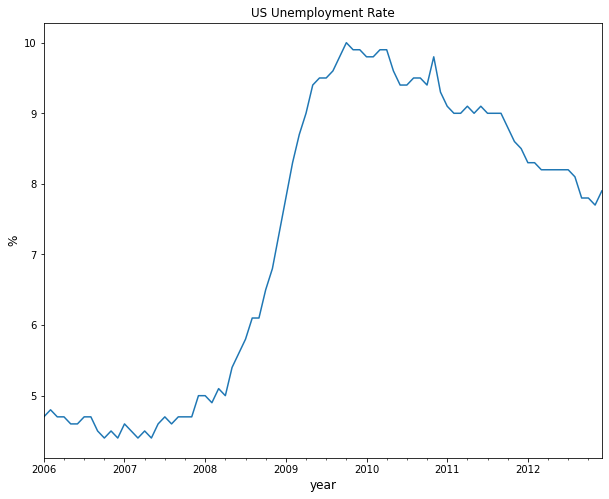

In [124]:
ax = data['2006':'2012'].plot(title='US Unemployment Rate', legend=False)
ax.set_xlabel('year', fontsize=12)
ax.set_ylabel('%', fontsize=12)
plt.show()

#### Using pandas_datareader and yfinance to Access Data

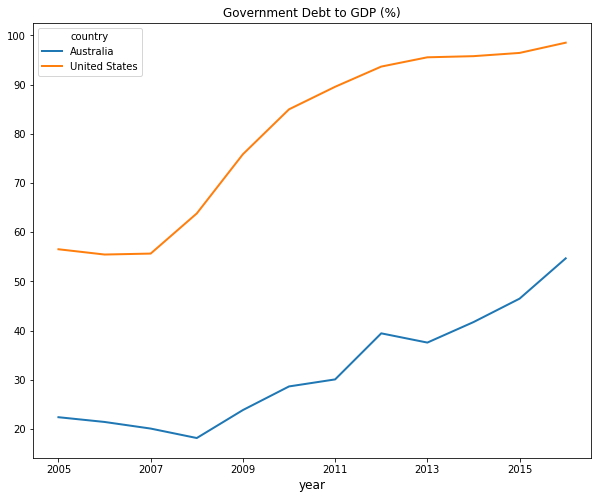

In [125]:
from pandas_datareader import wb

govt_debt = wb.download(indicator = 'GC.DOD.TOTL.GD.ZS', 
                        country=['US', 'AU'],
                        start = 2005,
                        end = 2016).stack().unstack(0)

ind = govt_debt.index.droplevel(-1)
govt_debt.index = ind
ax = govt_debt.plot(lw=2)
ax.set_xlabel('year', fontsize=12)

plt.title("Government Debt to GDP (%)")
plt.show()

### Exercises

In [126]:
#!pip install yfinance

In [127]:
import datetime as dt
import yfinance as yf

In [128]:
ticker_list = {'INTC': 'Intel',
               'MSFT': 'Microsoft',
               'IBM': 'IBM',
               'BHP': 'BHP',
               'TM': 'Toyota',
               'AAPL': 'Apple',
               'AMZN': 'Amazon',
               'BA': 'Boeing',
               'QCOM': 'Qualcomm',
               'KO': 'Coca-Cola',
               'GOOG': 'Google',
               'PTR': 'PetroChina'}

In [129]:
def read_data(ticker_list,

    start=dt.datetime(2021, 1, 1),
    end=dt.datetime(2021, 12, 31)):
    """
    This function reads in closing price data from Yahoo
    for each tick in the ticker_list.
    """

    ticker = pd.DataFrame()
    for tick in ticker_list:
        stock = yf.Ticker(tick)
        prices = stock.history(start=start, end=end)
        closing_prices = prices['Close']
        ticker[tick] = closing_prices

    return ticker

ticker = read_data(ticker_list)

Got error from yahoo api for ticker PTR, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
- PTR: No timezone found, symbol may be delisted


In [130]:
p1 = ticker.iloc[0] #Get the first set of prices as a Series
p2 = ticker.iloc[-1] #Get the last set of prices as a Series
price_change = (p2 - p1) / p1 * 100
price_change

INTC    6.9e+00
MSFT    5.7e+01
IBM     1.9e+01
BHP    -1.1e+01
TM      2.0e+01
AAPL    3.9e+01
AMZN    5.8e+00
BA     -4.9e-03
QCOM    2.5e+01
KO      1.5e+01
GOOG    6.9e+01
PTR         NaN
dtype: float64

In [131]:
change = ticker.pct_change(periods=len(ticker)-1, axis='rows')*100
price_change = change.iloc[-1]
price_change

INTC    6.9e+00
MSFT    5.7e+01
IBM     1.9e+01
BHP    -1.1e+01
TM      2.0e+01
AAPL    3.9e+01
AMZN    5.8e+00
BA     -4.9e-03
QCOM    2.5e+01
KO      1.5e+01
GOOG    6.9e+01
PTR         NaN
Name: 2021-12-30 00:00:00-05:00, dtype: float64

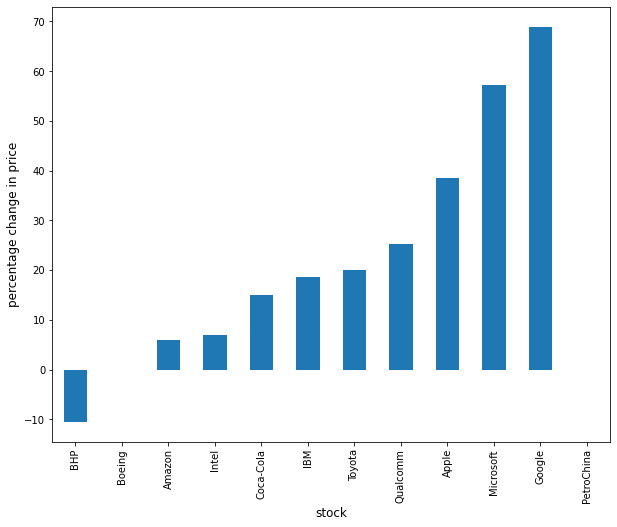

In [132]:
price_change.sort_values(inplace=True)
price_change = price_change.rename(index=ticker_list)
fig, ax = plt.subplots(figsize=(10,8))
ax.set_xlabel('stock', fontsize=12)
ax.set_ylabel('percentage change in price', fontsize=12)
price_change.plot(kind='bar', ax=ax)
plt.show()

In [133]:
indices_list = {'^GSPC': 'S&P 500',
                '^IXIC': 'NASDAQ',
                '^DJI': 'Dow Jones',
                '^N225': 'Nikkei'}

In [134]:
indices_data = read_data(indices_list,
                         start = dt.datetime(1971, 1, 1), #Common Start Date
                         end=dt.datetime(2021, 12, 31))

In [135]:
yearly_returns = pd.DataFrame()

for index, name in indices_list.items():
    p1 = indices_data.groupby(indices_data.index.year)[index].first() # Get the first set of returns as a DataFrame
    p2 = indices_data.groupby(indices_data.index.year)[index].last() # Get the last set of returns as a DataFrame
    returns = (p2 - p1) / p1
    yearly_returns[name] = returns

yearly_returns

,S&P 500,NASDAQ,Dow Jones,Nikkei
Date,,,,
1971,1.2e-01,1.4e-01,NaN,NaN
1972,1.6e-01,1.8e-01,NaN,NaN
1973,-1.8e-01,-3.2e-01,NaN,NaN
1974,-3.0e-01,-3.5e-01,NaN,NaN
1975,2.8e-01,2.8e-01,NaN,NaN
1976,1.8e-01,2.5e-01,NaN,NaN
1977,-1.1e-01,7.5e-02,NaN,NaN
1978,2.4e-02,1.3e-01,NaN,NaN
1979,1.2e-01,2.8e-01,NaN,NaN


In [136]:
yearly_returns.describe()

,S&P 500,NASDAQ,Dow Jones,Nikkei
count,5.1e+01,5.1e+01,3.0e+01,0.0
mean,9.2e-02,1.3e-01,9.1e-02,NaN
std,1.6e-01,2.5e-01,1.4e-01,NaN
min,-3.8e-01,-4.0e-01,-3.3e-01,NaN
25%,-2.2e-03,1.6e-04,2.5e-02,NaN
50%,1.2e-01,1.4e-01,8.9e-02,NaN
75%,2.0e-01,2.8e-01,2.1e-01,NaN
max,3.4e-01,8.4e-01,3.3e-01,NaN


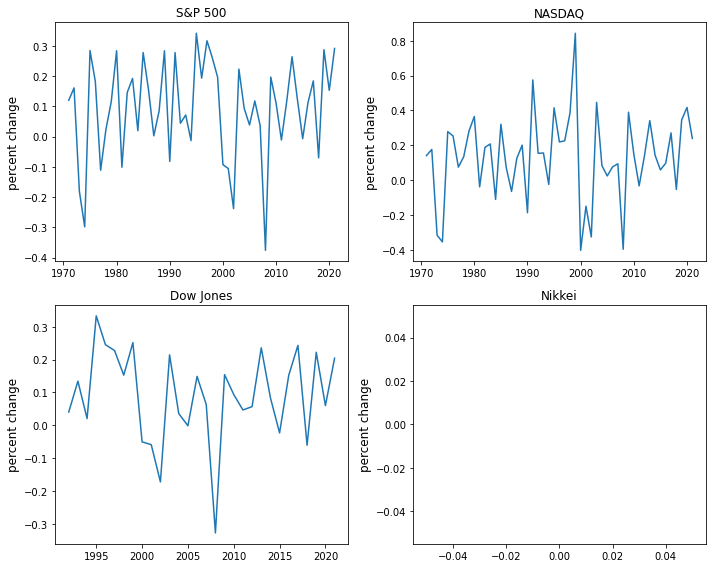

In [137]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

for iter_, ax in enumerate(axes.flatten()): # Flatten 2-D array to 1-D array
    index_name = yearly_returns.columns[iter_] # Get index name per iteration
    ax.plot(yearly_returns[index_name]) # Plot pct change of yearly returns per index
    ax.set_ylabel("percent change", fontsize = 12)
    ax.set_title(index_name)

plt.tight_layout()

### End.